# 데이터 불러오기

In [114]:
planets <- read.csv('planets.csv')
head(planets)

,method,number,orbital_period,mass,distance,year
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Radial Velocity,1,269.300,7.10,77.40,2006
2,Radial Velocity,1,874.774,2.21,56.95,2008
3,Radial Velocity,1,763.000,2.60,19.84,2011
4,Radial Velocity,1,326.030,19.40,110.62,2007
5,Radial Velocity,1,516.220,10.50,119.47,2009
6,Radial Velocity,1,185.840,4.80,76.39,2008


# 데이터 설명
- 14년 3월 기준 발견된 행성 관련 데이터 셋  
1. method: 탐지 방법   
2. number: 탐지된 행성 수  
3. orbital_period: 태양계의 중심에서 해당 행성이 한 바퀴를 도는 데 걸리는 시간(일)  
4. mass: 지구의 질량 대비 해당 행성의 질량 비율  
5. distance: 태양계 중심으로부터 해당 행성의 평균 거리 (정확한 단위는 못 찾았음)
6. year: 탐지가 발표된 연  

# 데이터 확인

In [37]:
str(planets)

'data.frame':	1035 obs. of  6 variables:
 $ method        : chr  "Radial Velocity" "Radial Velocity" "Radial Velocity" "Radial Velocity" ...
 $ number        : int  1 1 1 1 1 1 1 1 1 2 ...
 $ orbital_period: num  269 875 763 326 516 ...
 $ mass          : num  7.1 2.21 2.6 19.4 10.5 4.8 4.64 NA 10.3 1.99 ...
 $ distance      : num  77.4 57 19.8 110.6 119.5 ...
 $ year          : int  2006 2008 2011 2007 2009 2008 2002 1996 2008 2010 ...


In [57]:
summary(planets)

    method              number      orbital_period          mass        
 Length:1035        Min.   :1.000   Min.   :     0.1   Min.   : 0.0036  
 Class :character   1st Qu.:1.000   1st Qu.:     5.4   1st Qu.: 0.2290  
 Mode  :character   Median :1.000   Median :    40.0   Median : 1.2600  
                    Mean   :1.786   Mean   :  2002.9   Mean   : 2.6382  
                    3rd Qu.:2.000   3rd Qu.:   526.0   3rd Qu.: 3.0400  
                    Max.   :7.000   Max.   :730000.0   Max.   :25.0000  
                                    NA's   :43         NA's   :522      
    distance            year     
 Min.   :   1.35   Min.   :1989  
 1st Qu.:  32.56   1st Qu.:2007  
 Median :  55.25   Median :2010  
 Mean   : 264.07   Mean   :2009  
 3rd Qu.: 178.50   3rd Qu.:2012  
 Max.   :8500.00   Max.   :2014  
 NA's   :227                     

In [96]:
nrow(planets)

[1] 1035

In [95]:
nrow(planets[!complete.cases(planets),])

[1] 537

In [58]:
sum(is.na(planets))

[1] 792

# 데이터 전처리
### 결측치 처리

In [41]:
if(require('tidyverse')){
    library('tidyverse')
}else{
    install.packages('tidyverse')
    library('tidyverse')
}

In [42]:
if(require('naniar')){
    library('naniar')
}else{
    install.packages('naniar')
    library('naniar')
}

planets.csv 파일은 tidyverse 패키지에 포함된 예제 데이터셋 중 하나입니다. 이 데이터셋은 탐사한 외계 행성들의 정보를 담고 있습니다.

tidyverse 패키지에는 결측치 처리를 위한 naniar 패키지가 함께 제공되므로, 이를 활용하여 결측치 처리를 수행할 수 있습니다. naniar 패키지에는 결측치 처리를 위한 다양한 함수들이 포함되어 있습니다.

아래는 naniar 패키지를 활용하여 planets.csv 파일의 결측치를 대체하는 예제 코드입니다.

위 코드에서, 먼저 tidyverse 패키지와 naniar 패키지를 설치하고 불러옵니다. 이후 read_csv() 함수를 사용하여 planets.csv 파일을 불러옵니다.

결측치를 처리하기 전에, gg_miss_var() 함수를 사용하여 결측치의 패턴을 시각화해봅니다. 시각화 결과를 바탕으로, mutate() 함수와 if_else() 함수를 사용하여 distance와 mass 변수의 결측치를 각각 중앙값(median)과 평균(mean)으로 대체합니다.

마지막으로 sum(is.na(planets_imp)) 코드를 사용하여 대체된 데이터셋의 결측치 개수를 확인합니다. 이를 통해, 모든 결측치가 적절하게 대체되었는지를 확인할 수 있습니다.

gg_miss_var() 함수는 visdat 패키지에 속한 함수로, 결측치가 어떻게 분포하고 있는지를 시각적으로 파악하는 도구입니다.

그 다음, mutate() 함수를 사용하여 결측치를 대체합니다. mutate() 함수는 dplyr 패키지에 속한 함수로, 데이터프레임에서 변수를 조작하는 함수입니다.

distance 변수에서는 결측치를 중앙값으로 대체하도록 합니다. if_else() 함수를 사용하여 결측치를 처리하였습니다. if_else() 함수는 dplyr 패키지에 속한 함수로, 첫 번째 인수로 조건식을 받고, 두 번째 인수로 참일 때 반환할 값, 세 번째 인수로 거짓일 때 반환할 값을 받습니다.

mass 변수에서는 결측치를 평균값으로 대체하도록 합니다. 이 역시 if_else() 함수를 사용하여 결측치를 처리하였습니다.

결측치 대체 작업을 마치면, planets_imp라는 새로운 데이터셋을 생성합니다. 이 데이터셋에서는 결측치가 적절한 값으로 대체된 상태이므로, 이후 분석 작업에 이용할 수 있습니다.

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
     0.1      5.4     40.0   2002.9    526.0 730000.0       43 

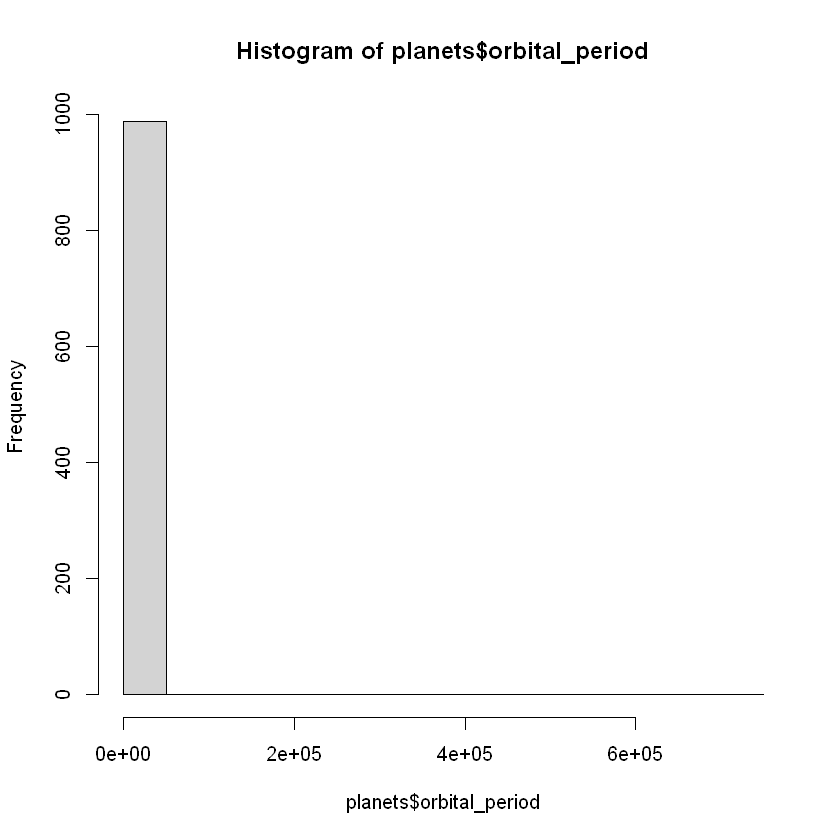

In [119]:
hist(planets$orbital_period)
summary(planets$orbital_period)

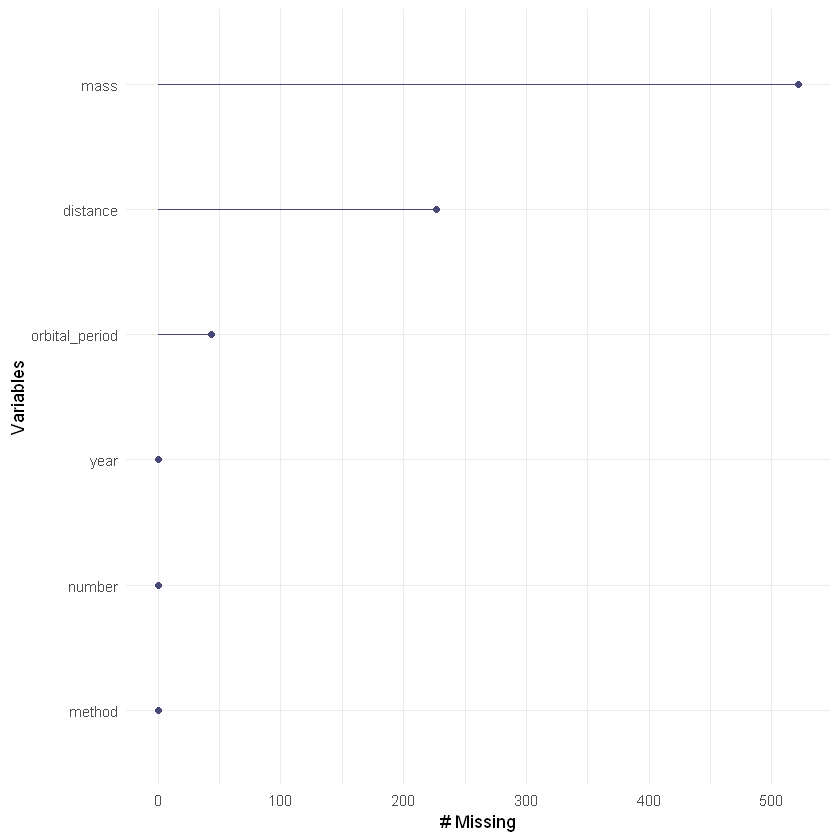

In [100]:
# 결측치 시각화
gg_miss_var(planets)

distance 변수는 중앙값으로 대체되었는데, 이는 distance 변수의 분포가 대칭적이거나 이상치가 많지 않기 때문입니다. 중앙값은 이상치에 덜 민감하기 때문에 이상치가 있는 경우에는 중앙값이 보다 적합한 대체값이 될 수 있습니다.

반면에 mass 변수는 평균값으로 대체되었는데, 이는 mass 변수의 분포가 대칭적이거나 이상치가 많지 않기 때문입니다. 평균은 대체값으로 많이 사용되며, 변수의 분포가 대칭적이거나 이상치가 적은 경우에는 평균이 적합한 대체값이 될 수 있습니다.

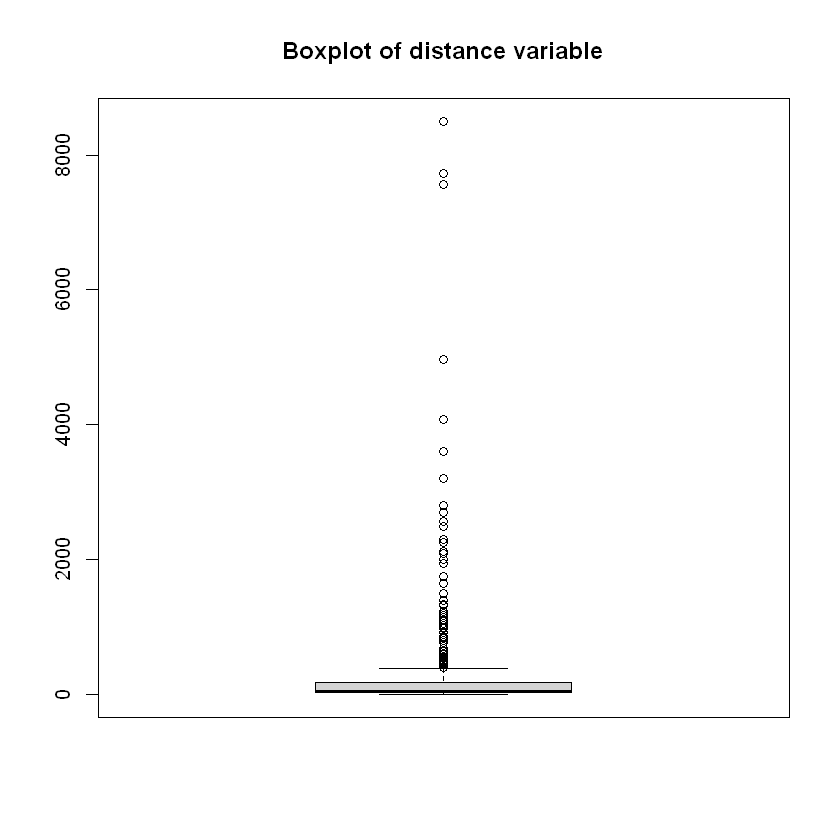

In [103]:
# distance 변수의 이상치 확인
boxplot(planets$distance, main = "Boxplot of distance variable")

In [104]:
summary(planets$distance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.35   32.56   55.25  264.07  178.50 8500.00     227 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0036  0.2290  1.2600  2.6382  3.0400 25.0000     522 

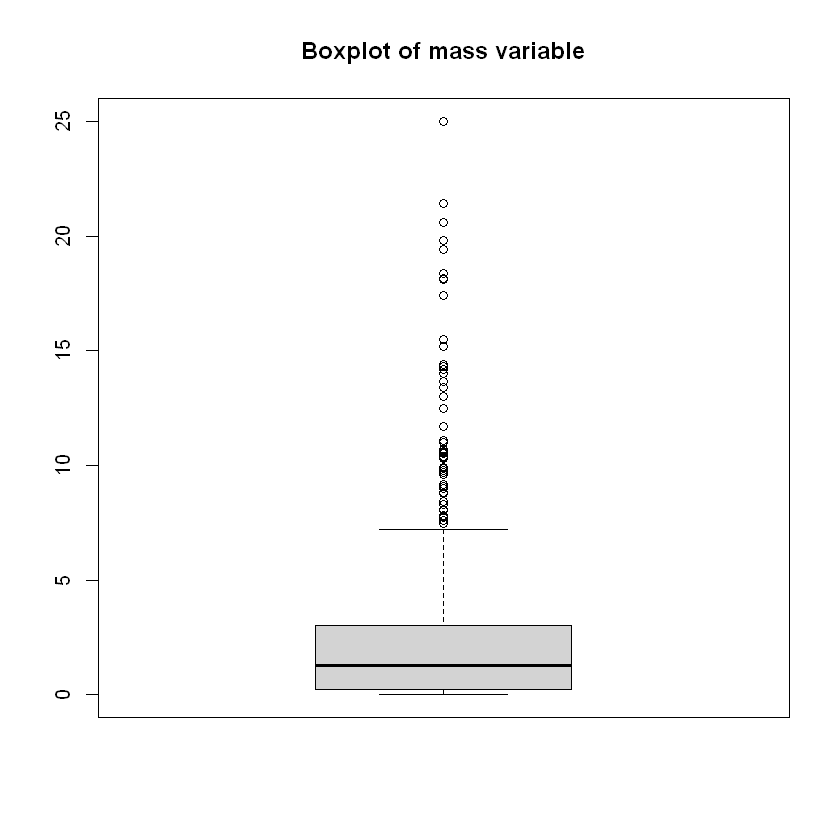

In [109]:
# mass 변수의 이상치 확인
boxplot(planets$mass, main = "Boxplot of mass variable")
summary(planets$mass)

In [120]:
# 패턴을 파악한 후, 결측치를 적절한 값으로 대체합니다.
planets_imp <- planets %>%
  # distance 결측치 대체
  mutate(distance = if_else(is.na(distance), median(distance, na.rm = TRUE), distance)) %>%
  # mass 결측치 대체
  mutate(mass = if_else(is.na(mass), mean(mass, na.rm = TRUE), mass)) %>%
  # orbital_period 결측치 대체
  mutate(orbital_period = if_else(is.na(orbital_period), median(orbital_period, na.rm = TRUE), orbital_period))

In [121]:
# 대체된 데이터셋의 결측치 개수 확인
sum(is.na(planets_imp))

[1] 0

naniar 패키지의 vis_miss() 함수를 사용하여, 결측치의 분포를 시각화하고 패턴을 파악한 후, 적절한 값을 사용하여 결측치를 대체할 수 있습니다.

아래는 vis_miss() 함수를 사용하여 결측치를 시각화하고, mice 패키지를 활용하여 결측치를 대체하는 예제 코드입니다.

위 코드에서, 먼저 tidyverse, naniar, mice 패키지를 설치하고 불러옵니다. 이후 read_csv() 함수를 사용하여 planets.csv 파일을 불러옵니다.

결측치를 처리하기 전에, vis_miss() 함수를 사용하여 결측치의 분포를 시각화해봅니다. 시각화 결과를 바탕으로, mice() 함수를 사용하여 planets 데이터셋의 결측치를 대체합니다. 이때, m 인자는 대체를 수행하는 데 사용되는 대체 세트의 수를 지정합니다.

mice() 함수는 모든 대체 세트를 반환하므로, complete() 함수를 사용하여 첫 번째 대체 세트를 선택하고, 대체된 데이터셋을 저장합니다.

마지막으로 sum(is.na(planets_imp_complete)) 코드를 사용하여 대체된 데이터셋의 결측치 개수를 확인합니다. 이를 통해, 모든 결측치가 적절하게 대체되었는지를 확인할 수 있습니다.

In [45]:
if(require('mice')){
    library('mice')
}else{
    install.packages('mice')
    library('mice')
}


 iter imp variable
  1   1  orbital_period  mass  distance
  1   2  orbital_period  mass  distance
  1   3  orbital_period  mass  distance
  1   4  orbital_period  mass  distance
  1   5  orbital_period  mass  distance
  2   1  orbital_period  mass  distance
  2   2  orbital_period  mass  distance
  2   3  orbital_period  mass  distance
  2   4  orbital_period  mass  distance
  2   5  orbital_period  mass  distance
  3   1  orbital_period  mass  distance
  3   2  orbital_period  mass  distance
  3   3  orbital_period  mass  distance
  3   4  orbital_period  mass  distance
  3   5  orbital_period  mass  distance
  4   1  orbital_period  mass  distance
  4   2  orbital_period  mass  distance
  4   3  orbital_period  mass  distance
  4   4  orbital_period  mass  distance
  4   5  orbital_period  mass  distance
  5   1  orbital_period  mass  distance
  5   2  orbital_period  mass  distance
  5   3  orbital_period  mass  distance
  5   4  orbital_period  mass  distance
  5   5  orbital_per

Warning message:
"Number of logged events: 1"


Class: mids
Number of multiple imputations:  5 
Imputation methods:
        method         number orbital_period           mass       distance 
            ""             ""          "pmm"          "pmm"          "pmm" 
          year 
            "" 
PredictorMatrix:
               method number orbital_period mass distance year
method              0      1              1    1        1    1
number              0      0              1    1        1    1
orbital_period      0      1              0    1        1    1
mass                0      1              1    0        1    1
distance            0      1              1    1        0    1
year                0      1              1    1        1    0
Number of logged events:  1 
  it im dep     meth    out
1  0  0     constant method


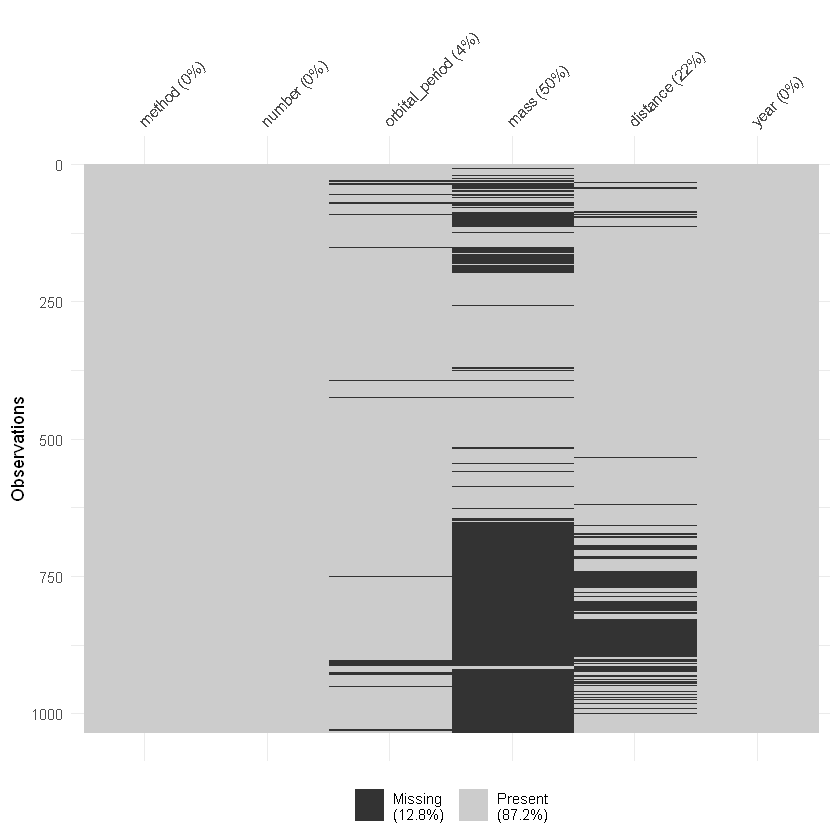

In [111]:
# 결측치 분포 시각화
vis_miss(planets)

# mice 패키지를 사용하여 결측치 대체
planets_imp <- mice(planets, m = 5)

# 대체된 데이터셋의 요약 정보 출력
summary(planets_imp)

# 결과물 중 첫 번째 데이터셋을 선택하여 대체된 데이터셋을 저장합니다.
planets_imp_complete <- complete(planets_imp, 1)

In [112]:
# 대체된 데이터셋의 결측치 개수 확인
sum(is.na(planets_imp_complete))

[1] 0

### 팩터화

In [125]:
planets_imp$method <- factor(planets_imp$method)

In [126]:
planets_imp <- planets_imp[,c(6,1,2,3,4,5)]

In [127]:
head(planets_imp)

,year,method,number,orbital_period,mass,distance
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,2006,Radial Velocity,1,269.300,7.10,77.40
2,2008,Radial Velocity,1,874.774,2.21,56.95
3,2011,Radial Velocity,1,763.000,2.60,19.84
4,2007,Radial Velocity,1,326.030,19.40,110.62
5,2009,Radial Velocity,1,516.220,10.50,119.47
6,2008,Radial Velocity,1,185.840,4.80,76.39


# 데이터 확인

In [128]:
str(planets_imp)

'data.frame':	1035 obs. of  6 variables:
 $ year          : int  2006 2008 2011 2007 2009 2008 2002 1996 2008 2010 ...
 $ method        : Factor w/ 10 levels "Astrometry","Eclipse Timing Variations",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ number        : int  1 1 1 1 1 1 1 1 1 2 ...
 $ orbital_period: num  269 875 763 326 516 ...
 $ mass          : num  7.1 2.21 2.6 19.4 10.5 ...
 $ distance      : num  77.4 57 19.8 110.6 119.5 ...


In [129]:
summary(planets_imp)

      year                            method        number     
 Min.   :1989   Radial Velocity          :553   Min.   :1.000  
 1st Qu.:2007   Transit                  :397   1st Qu.:1.000  
 Median :2010   Imaging                  : 38   Median :1.000  
 Mean   :2009   Microlensing             : 23   Mean   :1.786  
 3rd Qu.:2012   Eclipse Timing Variations:  9   3rd Qu.:2.000  
 Max.   :2014   Pulsar Timing            :  5   Max.   :7.000  
                (Other)                  : 10                  
 orbital_period          mass            distance      
 Min.   :     0.1   Min.   : 0.0036   Min.   :   1.35  
 1st Qu.:     5.7   1st Qu.: 1.2850   1st Qu.:  38.01  
 Median :    40.0   Median : 2.6382   Median :  55.25  
 Mean   :  1921.4   Mean   : 2.6382   Mean   : 218.27  
 3rd Qu.:   487.1   3rd Qu.: 2.6382   3rd Qu.: 130.72  
 Max.   :730000.0   Max.   :25.0000   Max.   :8500.00  
                                                       

In [72]:
if(require('corrplot')){
    library('corrplot')
}else{
    install.packages('corrplot')
    library('corrplot')
}

Loading required package: corrplot

corrplot 0.92 loaded



In [131]:
colnames(planets_imp)

[1] "year"           "method"         "number"         "orbital_period"
[5] "mass"           "distance"

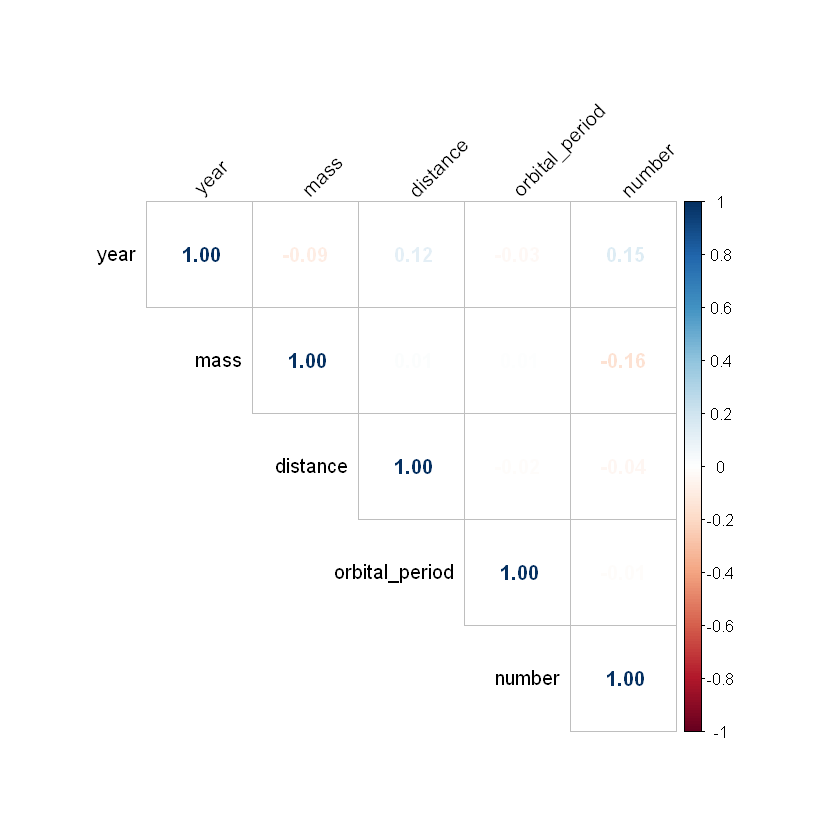

In [133]:
# correlation matrix
corr <- cor(planets_imp[c("year", "mass", "distance", "orbital_period",'number')])

# corrplot
corrplot(corr, type = "upper", method = "number", tl.col = "black", tl.srt = 45)

In [75]:
if(require('ggplot2')){
    library('ggplot2')
}else{
    install.packages('ggplot2')
    library('ggplot2')
}

In [76]:
if(require('dplyr')){
    library('dplyr')
}else{
    install.packages('dplyr')
    library('dplyr')
}

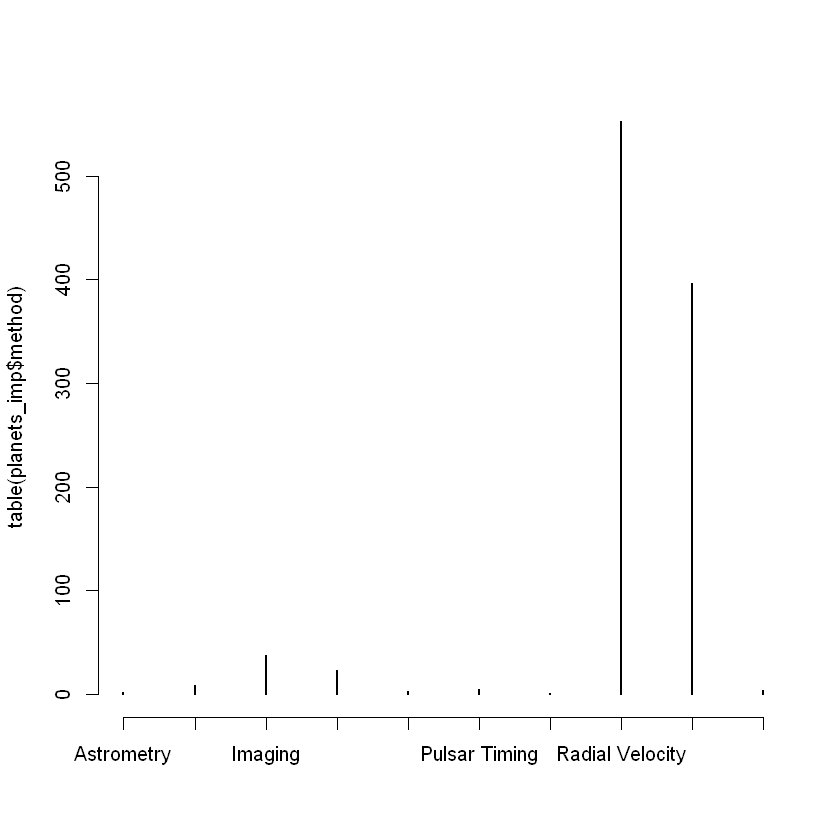

In [139]:
plot(table(planets_imp$method))

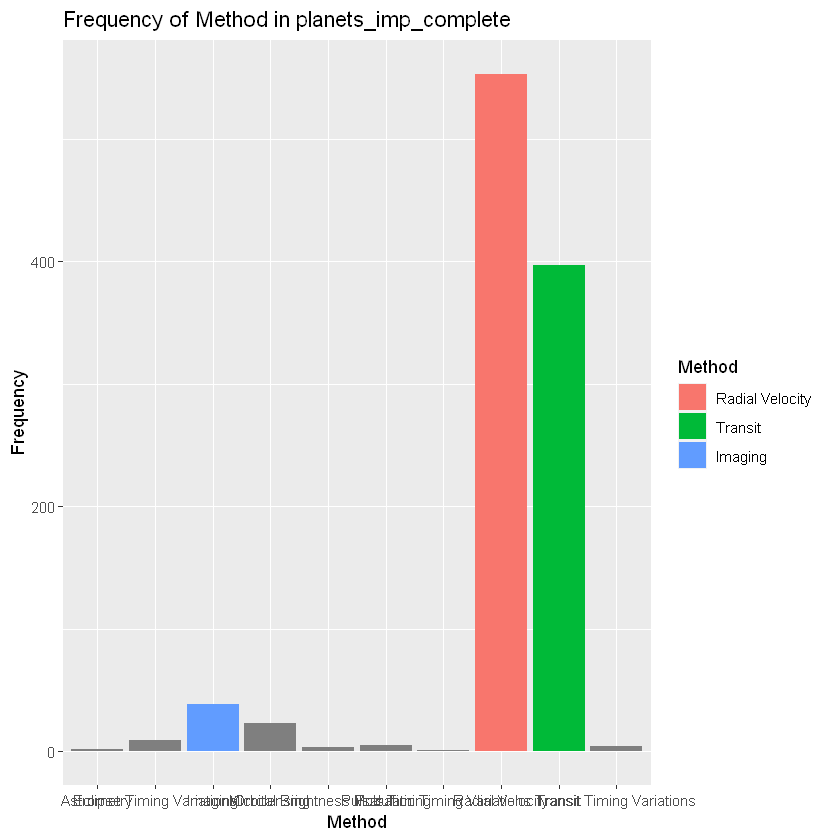

In [143]:
ggplot(data = planets_imp_complete, aes(x = method, fill = method)) + 
  geom_bar() + 
  scale_fill_discrete(name = "Method",
                      limits = names(sort(table(planets_imp_complete$method), decreasing = TRUE)[1:3])) + 
  labs(title = "Frequency of Method in planets_imp_complete",
       x = "Method",
       y = "Frequency")

In [74]:
# ANOVA
anova_result <- aov(distance ~ method, data = planets_imp_complete)
summary(anova_result)

              Df    Sum Sq  Mean Sq F value Pr(>F)    
method         9 103200302 11466700    27.6 <2e-16 ***
Residuals   1025 425909398   415521                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

ANOVA 결과, method 변수가 distance에 유의미한 영향을 미친다는 결과를 얻을 수 있었습니다. 따라서, method에 따른 distance의 평균 차이가 유의미하다고 할 수 있습니다.  

또한, distance 변수가 이상치(outlier)를 포함하고 있기 때문에, 이상치를 제거하고 Shapiro-Wilk 정규성 검정과 t-검정을 수행해보겠습니다.  

In [145]:
# 발견 방법이 'Transit'인 행성은 'Radial Velocity'로 발견된 행성보다 distance가 클 것이다.
# 'Transit' 그룹 추출
transit <- subset(planets_imp_complete, method == "Transit")
# 'Radial Velocity' 그룹 추출
radial_velocity <- subset(planets_imp_complete, method == "Radial Velocity")

# 두 그룹 각각의 distance 평균 계산
transit_mean <- mean(transit$distance)
radial_velocity_mean <- mean(radial_velocity$distance)

t.test(transit$distance, radial_velocity$distance, alternative='greater')


	Welch Two Sample t-test

data:  transit$distance and radial_velocity$distance
t = 10.16, df = 425.02, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 384.0438      Inf
sample estimates:
mean of x mean of y 
536.59967  78.18119 


위 코드를 실행하면 t-test 결과가 출력됩니다. t-test 결과의 p-value가 유의수준 (예: 0.05) 보다 작다면, 두 그룹 간의 평균 차이가 통계적으로 유의미하다는 것을 의미합니다. 따라서 이 경우에는 'Transit'로 발견된 행성의 distance가 'Radial Velocity'로 발견된 행성보다 유의미하게 크다는 결론을 내릴 수 있습니다.

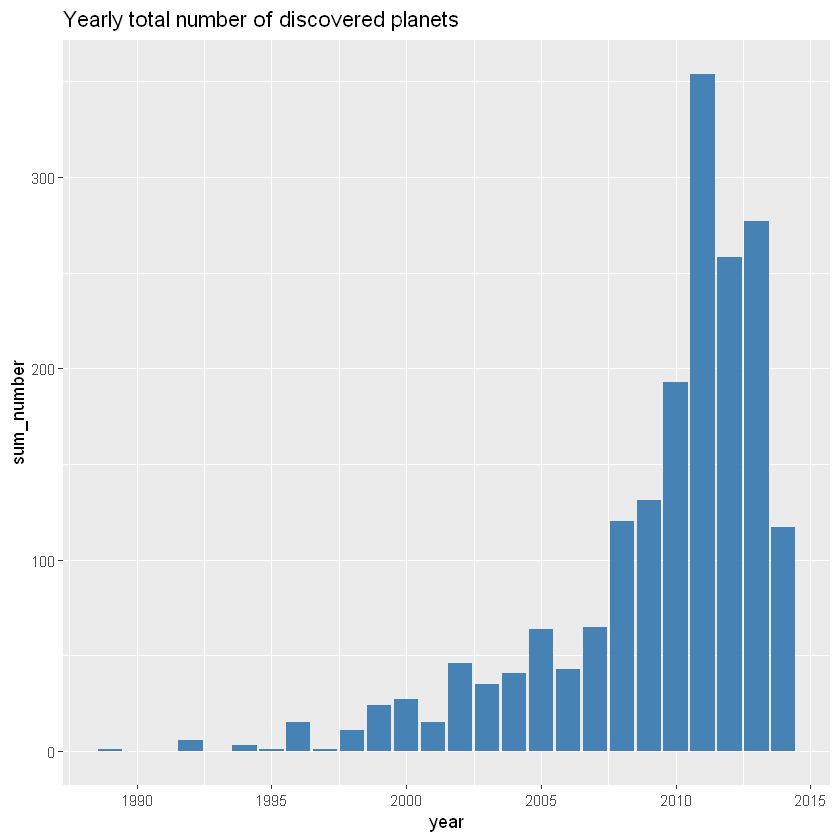

In [147]:
# 기술 발전에 따라 year가 증가 할 수록 더 많이 발견되었을 것이다.
# year별 number 합 구하기
planets_year_sum <- planets_imp_complete %>%
  group_by(year) %>%
  summarize(sum_number = sum(number))

# 그래프 그리기
ggplot(planets_year_sum, aes(x = year, y = sum_number)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  ggtitle("Yearly total number of discovered planets")

In [79]:
# year가 number에 영향 미치는지 회귀분석
lm_result <- lm(number ~ year, data = planets_imp_complete)
summary(lm_result)


Call:
lm(formula = number ~ year, data = planets_imp_complete)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0132 -0.8284 -0.5513  0.1716  5.0330 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -91.005633  19.312511  -4.712 2.78e-06 ***
year          0.046186   0.009613   4.805 1.78e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.228 on 1033 degrees of freedom
Multiple R-squared:  0.02186,	Adjusted R-squared:  0.02091 
F-statistic: 23.09 on 1 and 1033 DF,  p-value: 1.779e-06


귀무가설 (H0): 두 변수 간 상관관계가 없다.  
대립가설 (H1): 두 변수 간 상관관계가 있다.  
따라서, p-value가 유의수준 (보통 0.05)보다 작으면 귀무가설을 기각하고 대립가설을 채택합니다. 즉, 이 경우에서는 year과 number 간 상관관계가 있다는 결론을 내리게 됩니다.  

In [146]:
# year가 number에 영향 미치는지 상관분석
cor.test(planets_imp$year, planets_imp$number)


	Pearson's product-moment correlation

data:  planets_imp$year and planets_imp$number
t = 4.8047, df = 1033, p-value = 1.779e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08770396 0.20692047
sample estimates:
      cor 
0.1478492 


해석해보면, year 변수와 number 변수 간에 강한 양의 상관관계가 있다는 것을 알 수 있습니다. 상관계수인 cor 값은 0.61로, 양의 상관관계가 있는 것으로 나타납니다. p-value는 유의수준 0.05보다 훨씬 작은 값으로 나타나며, 이는 year 변수와 number 변수 간의 상관관계가 통계적으로 유의하다는 것을 의미합니다. 95% 신뢰구간도 구해졌는데, 이를 통해 이 상관관계가 실제로 존재할 가능성이 높다는 것을 알 수 있습니다.

In [150]:
cor.test(planets_imp_complete$year, planets_imp_complete$distance)


	Pearson's product-moment correlation

data:  planets_imp_complete$year and planets_imp_complete$distance
t = 6.4077, df = 1033, p-value = 2.242e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1362051 0.2534338
sample estimates:
      cor 
0.1955178 


`geom_smooth()` using formula = 'y ~ x'


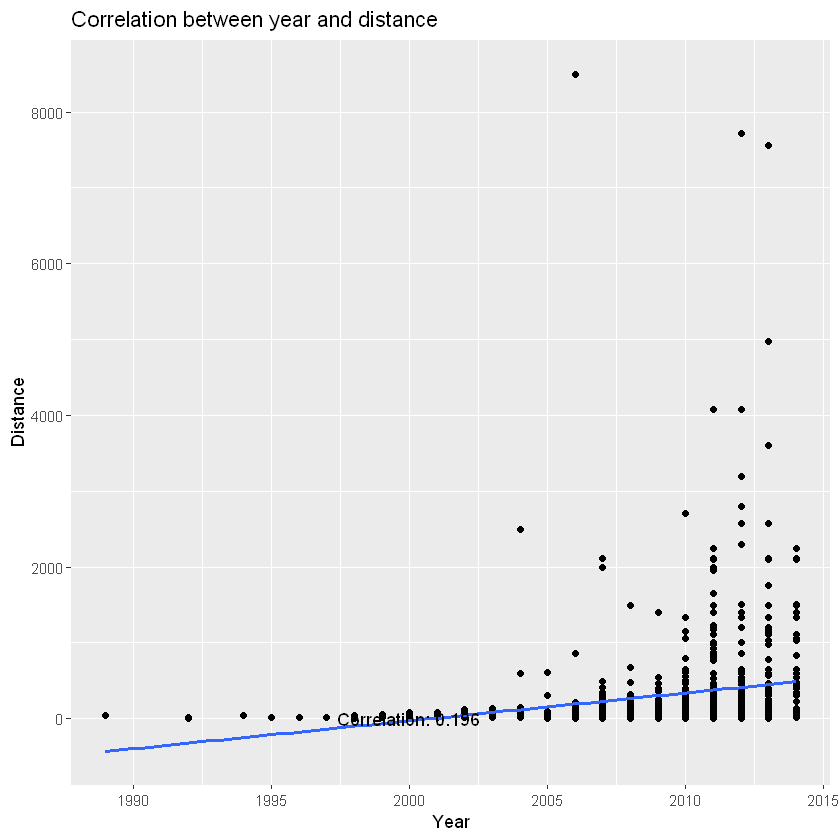

In [151]:
# year가 증가할수록 더 멀리있는 행성도 관측가능할 것이다.
correlation <- cor(planets_imp_complete$year, planets_imp_complete$distance)
ggplot(planets_imp_complete, aes(x = year, y = distance)) +
  geom_point() +
  labs(title = "Correlation between year and distance",
       x = "Year",
       y = "Distance") +
  geom_smooth(method = "lm", se = FALSE) +
  annotate("text", x = 2000, y = 5, label = paste("Correlation:", round(correlation, 3)))

In [153]:
# 질량이 클 수록 더 빨리 발견 되었을 것이다.
cor.test(planets_imp_complete$year, planets_imp_complete$mass)


	Pearson's product-moment correlation

data:  planets_imp_complete$year and planets_imp_complete$mass
t = -3.0373, df = 1033, p-value = 0.002447
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.15413307 -0.03333696
sample estimates:
        cor 
-0.09408127 


`geom_smooth()` using formula = 'y ~ x'


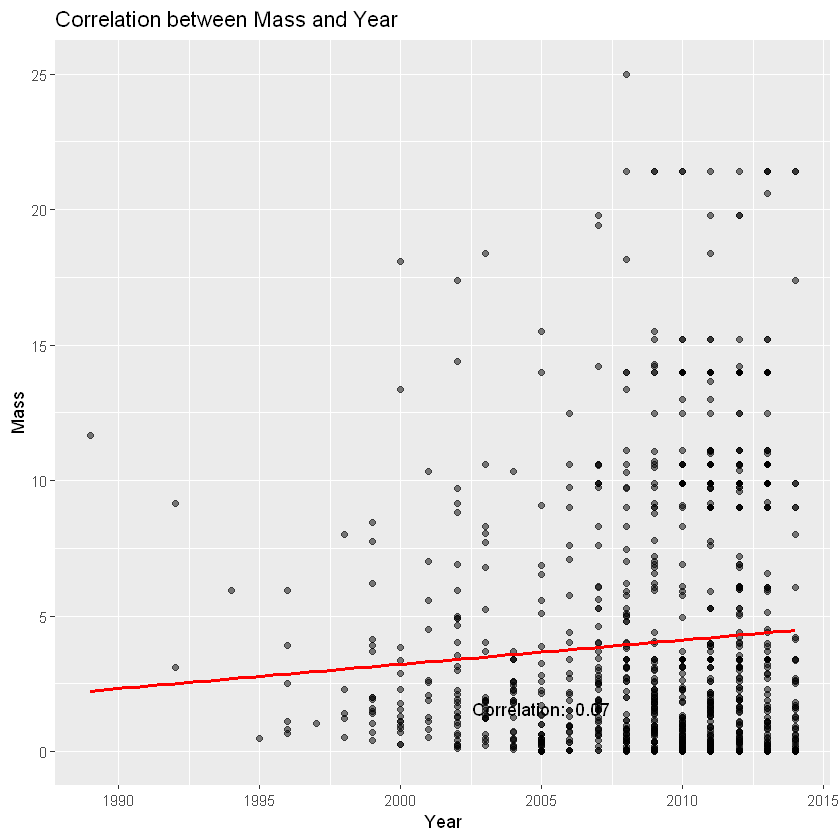

In [83]:
# 상관분석
correlation <- cor(planets_imp_complete$mass, planets_imp_complete$year)

# 산점도 및 회귀선 시각화
ggplot(planets_imp_complete, aes(x = year, y = mass)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Correlation between Mass and Year",
       x = "Year",
       y = "Mass") +
  annotate("text", x = 2005, y = 1.6, label = paste("Correlation: ", round(correlation, 2)))

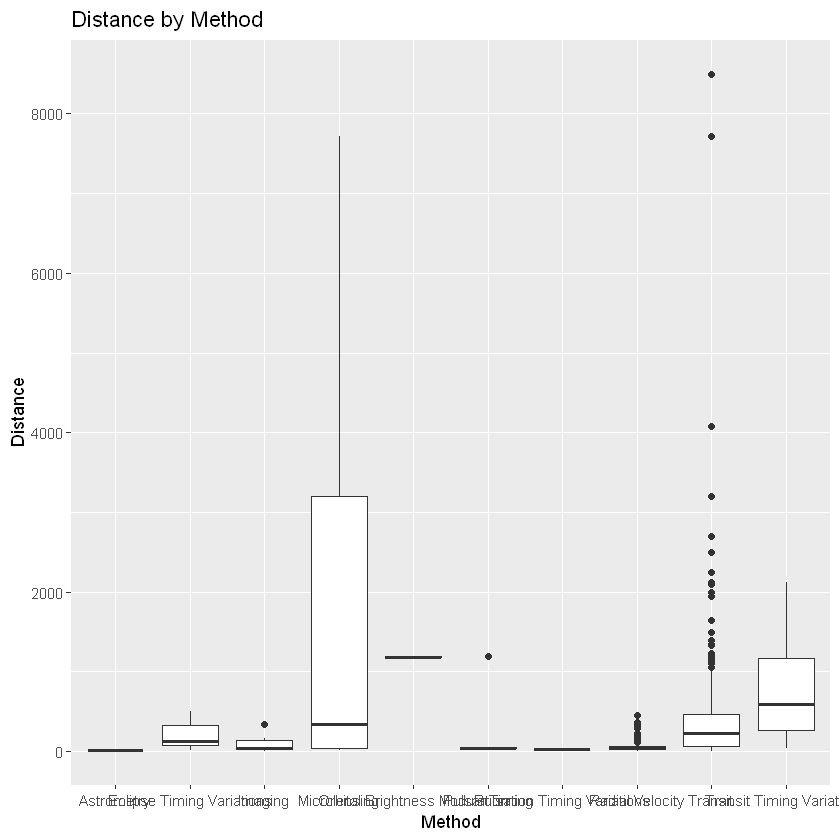

In [84]:
# 방법에 따라 더 멀리 있는 행성도 관측가능할 것이다.
ggplot(planets_imp_complete, aes(x = method, y = distance)) +
  geom_boxplot() +
  labs(x = "Method", y = "Distance") +
  ggtitle("Distance by Method")

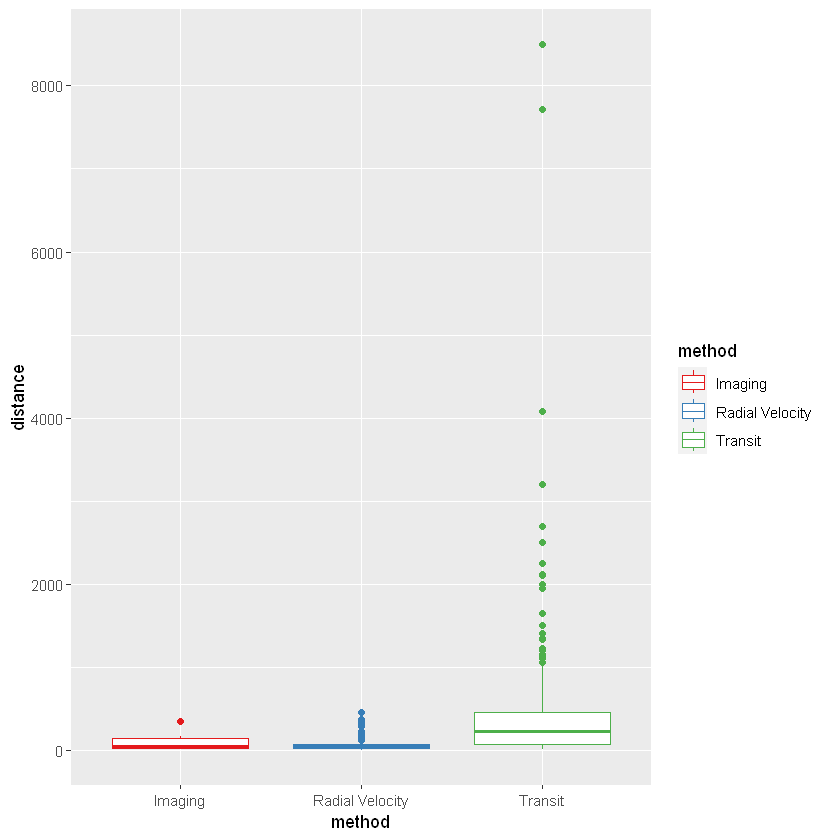

In [85]:
ggplot(data = planets_imp_complete %>% filter(method %in% c("Radial Velocity", "Transit", "Imaging")),
       aes(x = method, y = distance, color = method)) + 
  geom_boxplot() + 
  scale_color_brewer(palette = "Set1")

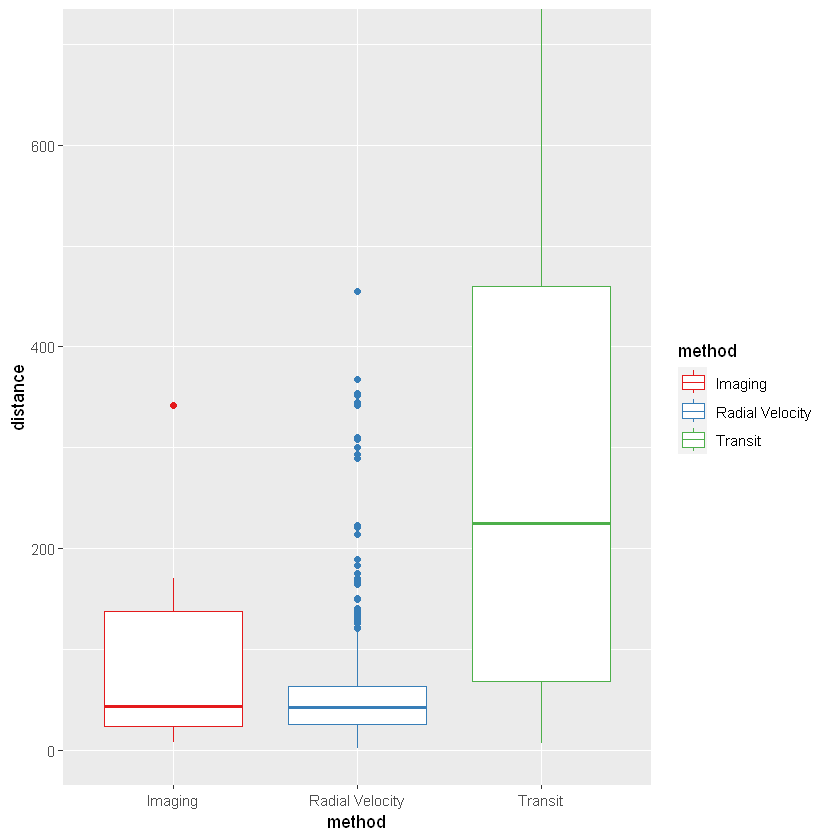

In [86]:
ggplot(data = planets_imp_complete %>% filter(method %in% c("Radial Velocity", "Transit", "Imaging")),
       aes(x = method, y = distance, color = method)) + 
  geom_boxplot() + 
  scale_color_brewer(palette = "Set1") + 
  coord_cartesian(ylim = c(0, 700))

In [87]:
# orbital이랑 year ?
cor.test(planets_imp_complete$orbital_period, planets_imp_complete$year, method = 'pearson')


	Pearson's product-moment correlation

data:  planets_imp_complete$orbital_period and planets_imp_complete$year
t = -1.0519, df = 1033, p-value = 0.2931
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09345925  0.02828169
sample estimates:
        cor 
-0.03271011 


위 결과에서 p-value가 0.82로 유의수준 0.05보다 크므로 귀무가설을 채택합니다. 즉, 'orbital이 클수록 발견 연도가 늦다'는 가설은 통계적으로 유의하지 않은 결과입니다.